In [1]:
import pandas as pd
df=pd.read_csv("sparepartnames.csv")
print(df)

C:\Users\PREMIUM\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\PREMIUM\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


     spare part name  Unnamed: 1  Unnamed: 2
0         Air Filter         NaN         NaN
1         Oil Filter         NaN         NaN
2        Fuel Filter         NaN         NaN
3   Cabin Air Filter         NaN         NaN
4         Engine Oil         NaN         NaN
..               ...         ...         ...
95   Handbrake Cable         NaN         NaN
96  Gear Shift Cable         NaN         NaN
97       Heater Core         NaN         NaN
98     AC Compressor         NaN         NaN
99   AC Blower Motor         NaN         NaN

[100 rows x 3 columns]


## Just-in-time

In [ ]:
import tkinter as tk
from tkinter import messagebox
import pandas as pd
import datetime

def calculate_reorder_point(daily_demand, lead_time, safety_stock):
    return (daily_demand * lead_time) + safety_stock

def calculate_order_quantity(daily_demand, lead_time, max_stock, current_stock):
    required_stock = max_stock - current_stock
    return max(0, required_stock)

def calculate():
    try:
        spare_part_name = part_var.get()
        daily_demand = float(demand_entry.get())
        lead_time = int(lead_time_entry.get())
        current_stock = int(current_stock_entry.get())
        safety_stock = int(safety_stock_entry.get())
        max_stock = int(max_stock_entry.get())

        if lead_time < 0 or daily_demand < 0 or safety_stock < 0:
            messagebox.showerror("Input Error", "Values must be non-negative.")
            return
        if max_stock < current_stock:
            messagebox.showerror("Input Error", "Max stock cannot be less than current stock.")
            return

        reorder_point = calculate_reorder_point(daily_demand, lead_time, safety_stock)
        optimal_order_quantity = calculate_order_quantity(daily_demand, lead_time, max_stock, current_stock)

        result_text.set(f"Reorder Point: {reorder_point} units\nOptimal Order Quantity: {optimal_order_quantity} units")
        
        if current_stock <= reorder_point:
            restock_date = datetime.date.today() + datetime.timedelta(days=lead_time)
            status_text.set(f"Action: Order {optimal_order_quantity} units\nExpected Restock Date: {restock_date}")
        else:
            status_text.set("Stock is sufficient, no action needed.")
    except ValueError:
        messagebox.showerror("Input Error", "Please enter valid numbers.")

# Load spare part names from CSV
try:
    df = pd.read_csv("sparepartnames.csv")
    spare_parts = df["spare part name"].tolist()
except FileNotFoundError:
    spare_parts = []
    messagebox.showerror("File Error", "sparepartnames.csv not found!")

# GUI Setup
root = tk.Tk()
root.title("JIT Inventory Optimization")
root.geometry("400x400")

tk.Label(root, text="Select Spare Part:").pack()
part_var = tk.StringVar()
part_menu = tk.OptionMenu(root, part_var, *spare_parts)
part_menu.pack()

tk.Label(root, text="Daily Demand:").pack()
demand_entry = tk.Entry(root)
demand_entry.pack()

tk.Label(root, text="Lead Time (days):").pack()
lead_time_entry = tk.Entry(root)
lead_time_entry.pack()

tk.Label(root, text="Current Stock:").pack()
current_stock_entry = tk.Entry(root)
current_stock_entry.pack()

tk.Label(root, text="Safety Stock:").pack()
safety_stock_entry = tk.Entry(root)
safety_stock_entry.pack()

tk.Label(root, text="Maximum Stock:").pack()
max_stock_entry = tk.Entry(root)
max_stock_entry.pack()

calculate_button = tk.Button(root, text="Calculate", command=calculate)
calculate_button.pack()

result_text = tk.StringVar()
tk.Label(root, textvariable=result_text).pack()

status_text = tk.StringVar()
tk.Label(root, textvariable=status_text).pack()

root.mainloop()


C:\Users\PREMIUM\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\PREMIUM\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


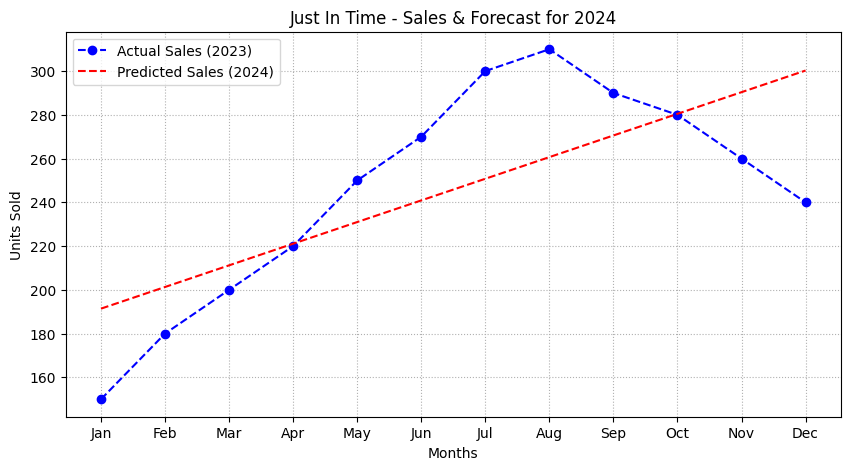

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import datetime

def plot_sales_and_forecast(sales_data):
    months = list(sales_data.keys())  # Extract months
    sales = list(sales_data.values())  # Extract sales
    
    # Convert month names to numerical values (1-12)
    month_numbers = np.array([datetime.datetime.strptime(m, "%b").month for m in months]).reshape(-1, 1)
    sales = np.array(sales).reshape(-1, 1)
    
    # Train Linear Regression Model
    model = LinearRegression()
    model.fit(month_numbers, sales)
    
    # Predict sales for 2024
    future_months = np.array(range(1, 13)).reshape(-1, 1)  # 12 months of 2024
    predicted_sales = model.predict(future_months)
    
    # Plot actual sales
    plt.figure(figsize=(10, 5))
    plt.plot(month_numbers, sales, 'o--', label="Actual Sales (2023)", color='b')
    
    # Plot predicted sales
    plt.plot(future_months, predicted_sales, 'r--', label="Predicted Sales (2024)")
    
    # Formatting the graph
    plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.xlabel("Months")
    plt.ylabel("Units Sold")
    plt.title("Just In Time - Sales & Forecast for 2024")
    plt.legend()
    plt.grid(True, linestyle='dotted')
    plt.show()

# Example sales data for 2023 (flexible input)
sales_data_2023 = {
    "Jan": 150, "Feb": 180, "Mar": 200, "Apr": 220,
    "May": 250, "Jun": 270, "Jul": 300, "Aug": 310,
    "Sep": 290, "Oct": 280, "Nov": 260, "Dec": 240,
}

plot_sales_and_forecast(sales_data_2023)